In [9]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt

In [10]:
data = np.genfromtxt('./Admission_Predict.csv', delimiter=',', skip_header=1)
# print(data)
X_train_unnormalized= np.array(data[:,1:7])
y_train = np.array(data[:,8])

In [11]:
def zscore_normalize_features(X):
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return X_norm

In [12]:
def mean_normalize_features(X):
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    x_max     = np.max(X, axis=0)  
    x_min     = np.min(X, axis=0)  
    X_norm = (X - mu) / (x_max-x_min)   

    return X_norm

In [13]:
# X_train =X_train_unnormalized
X_train = zscore_normalize_features(X_train_unnormalized)
# X_train = mean_normalize_features(X_train_unnormalized)

In [14]:
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p  

In [15]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost


# # uncomment for calculating cost with vectorized approach
# def compute_cost(x,y,w,b):
#     f_wb = np.dot(x,w)+b
#     cost = ((f_wb-y)**2)
#     cost = np.sum(cost)/(2*x.shape[0])
#     return cost

In [16]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

# uncomment for calculating gradient with vectorized approach
# def compute_gradient(X, y, w, b):
#     m = X.shape[0]
    
#     # Compute predictions
#     predictions = np.dot(X, w) + b
    
#     # Compute error
#     errors = predictions - y
    
#     # Compute gradients
#     dj_dw = np.dot(X.T, errors) / m
#     dj_db = np.sum(errors) / m

#     return dj_db, dj_dw

In [17]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [18]:
# initialize parameters
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 500
alpha = 1.0e-2
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     0.27   
Iteration   50: Cost     0.10   
Iteration  100: Cost     0.04   
Iteration  150: Cost     0.01   
Iteration  200: Cost     0.01   
Iteration  250: Cost     0.00   
Iteration  300: Cost     0.00   
Iteration  350: Cost     0.00   
Iteration  400: Cost     0.00   
Iteration  450: Cost     0.00   
b,w found by gradient descent: 0.72,[0.0313417  0.02349812 0.01027779 0.00323085 0.01997958 0.05237715] 
prediction: 0.94, target value: 0.92
prediction: 0.79, target value: 0.76
prediction: 0.65, target value: 0.72
prediction: 0.73, target value: 0.8
prediction: 0.64, target value: 0.65
prediction: 0.86, target value: 0.9
prediction: 0.71, target value: 0.75
prediction: 0.61, target value: 0.68
prediction: 0.54, target value: 0.5
prediction: 0.73, target value: 0.45
prediction: 0.73, target value: 0.52
prediction: 0.83, target value: 0.84
prediction: 0.85, target value: 0.78
prediction: 0.64, target value: 0.62
prediction: 0.62, target value: 0.61
prediction: 0

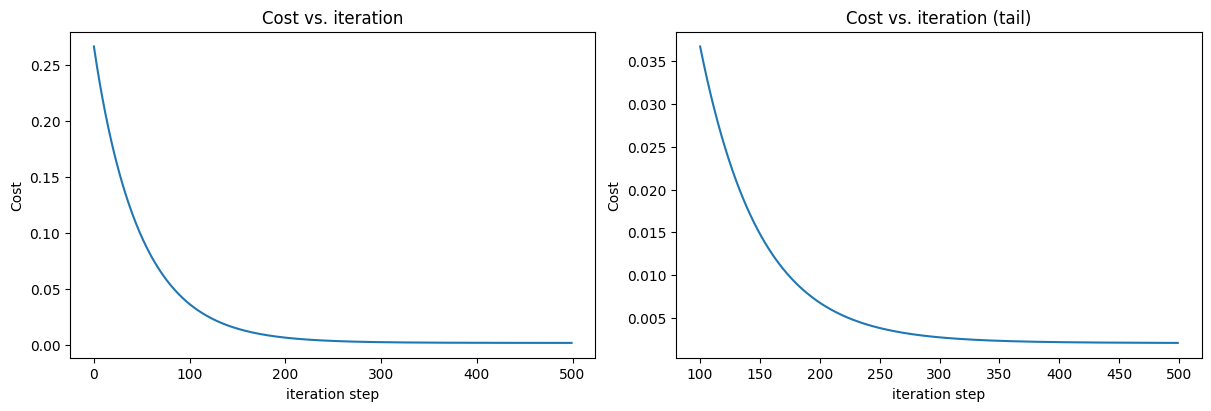

In [19]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()